In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

df=pd.read_csv(r"C:\Users\gouth\Desktop\Goutham\Stats\DataSet\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


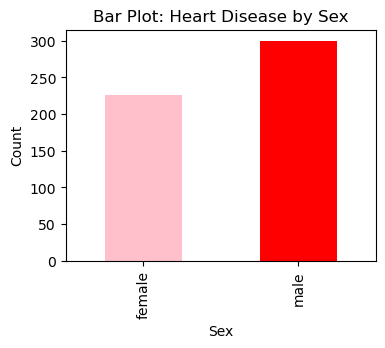

In [5]:
# //Simple Bar Plot: Heart Disease by Sex
plt.figure(figsize=(4,3))
df.groupby("sex")['target'].value_counts().unstack().iloc[:,1].plot(
    kind='bar',
    color=['pink','red']
)
plt.title('Bar Plot: Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0,1], ['female','male'])
plt.show()

C:\Users\gouth\AppData\Local\Temp\ipykernel_19612\2583137105.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([age_group, 'target']).size().unstack().plot(


<Figure size 400x300 with 0 Axes>

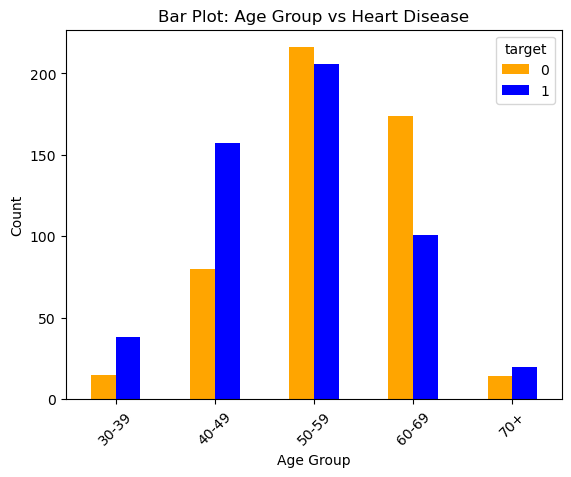

In [6]:
# //Multiple Bar Plot: Age Group vs Heart Disease
age_group = pd.cut(df['age'], bins=[29, 39, 49, 59, 69, 80], labels=['30-39', '40-49', '50-59', '60-69', '70+'])
plt.figure (figsize=(4, 3))
df.groupby([age_group, 'target']).size().unstack().plot(
    kind='bar',
    stacked=False,
    color=['orange', 'blue'])
plt.title('Bar Plot: Age Group vs Heart Disease')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

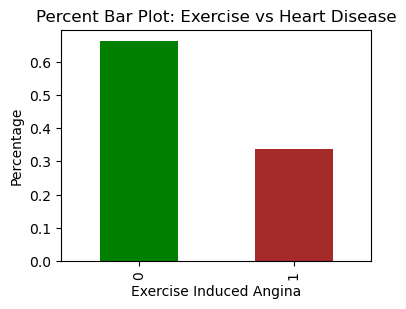

In [7]:
# //Percent Bar Plot: Exercise vs Heart Disease
exercise_group = df['exang'].value_counts(normalize = True)
plt.figure (figsize=(4, 3))
exercise_group.plot(kind='bar',
                    stacked=True,
                    color=['green', 'brown'])
plt.title('Percent Bar Plot: Exercise vs Heart Disease')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Percentage')
plt.show()

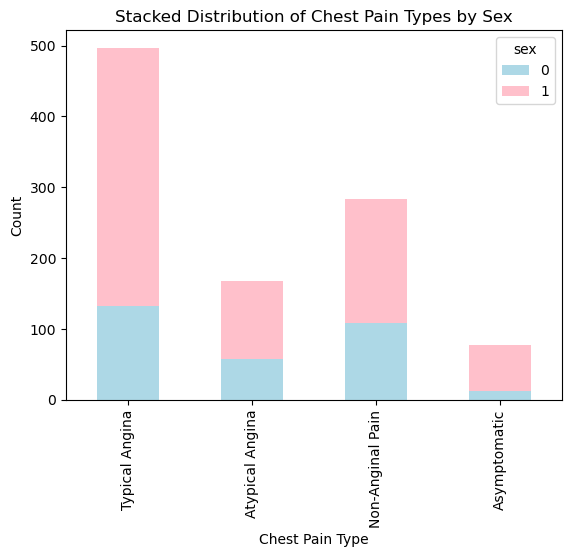

In [8]:
# //Component Bar Plot: Cp vs Sex (chest pain type)
df_grouped = df.groupby(['cp', 'sex']).size().unstack()
df_grouped.plot(kind='bar',
                stacked=True,
                color=['lightblue', 'pink'])
plt.title('Stacked Distribution of Chest Pain Types by Sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.show()

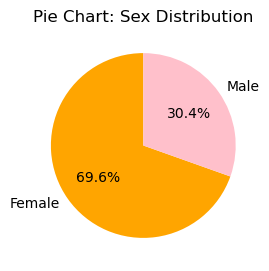

In [9]:
#Pie Chart
plt.figure(figsize = (4 ,3))
df['sex'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.1f%%',
    colors = ['orange','pink'],
    startangle = 90,
    labels = ['Female', 'Male']
)
plt.title('Pie Chart: Sex Distribution')
plt.ylabel("")
plt.show()

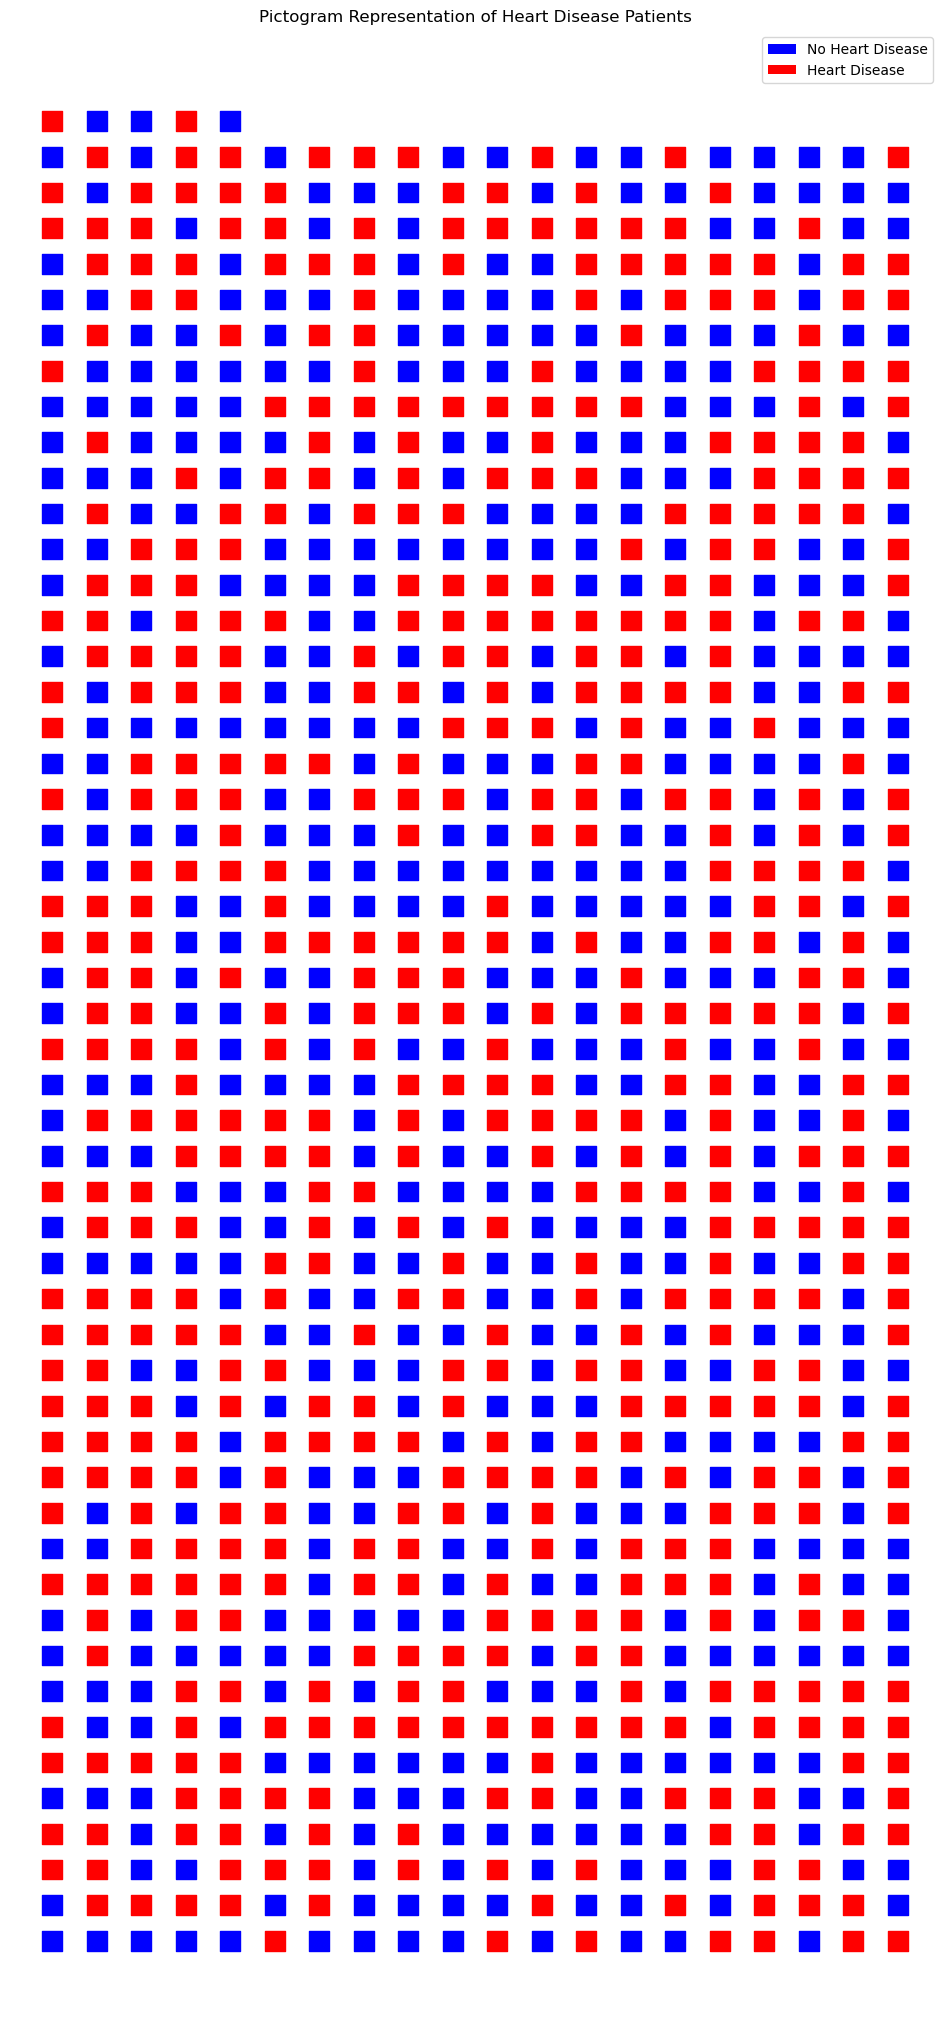

In [4]:
#Picktogram
heart_yes = df["target"].sum()
heart_no = len(df) - heart_yes
patients = df["target"].values
n = len(patients)
cols = 20
rows = int(np.ceil(n / cols))
x = np.arange(n) % cols
y = np.arange(n) // cols
colors = ["red" if t == 1 else "blue" for t in patients]
plt.figure(figsize=(12, rows/2))
plt.scatter(x, y, c=colors, marker="s", s=200)
legend_elements = [
    Patch(facecolor="blue", label="No Heart Disease"),
    Patch(facecolor="red", label="Heart Disease")
]
plt.legend(handles=legend_elements, loc="upper right")
plt.title("Pictogram Representation of Heart Disease Patients")
plt.axis("off")
plt.show()